# Food Carts and BARTs

## Introduction/Business Problem- Clearly define a problem or an idea of your choice, where you would need to leverage the Foursquare location data to solve or execute. 

#### A description of the problem and a discussion of the background:

#### Who and what? About the business:  In San Francisco, an enterprising male entrepreneur is launching new food cart service, centered around snacks and non-alcoholic beverages. He envisions starting with five food carts to distribute the company's presence to make a splash effect when it enters the market.  He wants to place them at high volume locations at peak times and may be open to placing one at multiple locations, or a couple at several locations, or some combination thereof.  He wants to sell to BART (BART, essentially the San Francisco metro, is an acronym for Bay Area Rapid Transit) commuters who are too busy to have gotten their beverage and/or snack at home, or are beverage and/or snack enthusiasts.  He wants to make efficient use of his limited food cart resources to ensure the project springs from the get-go.

#### Why this study? What next?:  This preliminary study is to provide a foundation for a future boots-on-the-ground survey of commuters to gauge project interest, which will ask whether or not the person drinks beverages (hot/cold) around that time of day, and whether or not they already had that beverage at home or outside.  This survey is out of the scope of this project, but its description serves to provide context for this project.

#### Where? BART research to do: There are four BART lines that run at regular intervals (in both directions) through the main San Francisco stops.  I'll need to determine the number of trains per hour running through a given station to determine times to analyze location data around the BART station coordinates. There are 9 main stops to investigate in the San Francisco area, titled Daly City, Balboa Park, and Glen Park, 24th St Mission, 16th St Mission, Civic Center/UN Plaza, Powell St., Montgomery St, and Embarcadero.  In geographic order, Daly City is the first stop and Embarcadero is the last stop in the downtown Financial District.  Perhaps ridership data is publicly available to give insights about the most active stations. Comparisons between the data sets could be made about different concepts of what constitutes a "good" station.

#### When? Timing research:  I hypothesize that finding a window in which the consumer has enough time to order and receive their request prior to boarding the BART is crucial.  I'll tentatively look at location/activity data times 10 minutes prior to train arrival.  If train arrival instance numbers are too high, remodeling may be needed to look only at activity over larger time chunks. Regardless, comparing specific time blocks with large time ranges will be important in determining how long mobile food carts will remain at a given location, so both scopes of data will be valuable.  I hypothesize that 06:30 - 08:30 will be especially active, as well as 11:30 - 13:30 and 16:30 - 18:30, as those are common time ranges of movement (also common mealtimes). I hypothesize that lunchtime will be especially active in the main four downtown locations, as there is a dense concentration of the workforce in those areas.  I also predict a wave of activity starting in the peripheral (outside of downtown) stations in the morning and moving towards downtown, and a reciprocal wave in the evening, starting at downtown stations and moving towards the periphery, due to assumed commute patterns and residential and urban geography.

#### How?: To obtain benchmarks for high activity times to target future survey participants, it will be important to confirm times during which cafes and/or coffee shops have the highest foot traffic around BART stations (Foursquare data), as well as other data. More on this below!

## Data Section- A description of the data and how it will be used to solve the problem.

#### I'll run Foursquare API “search” searches for specific venue categories to obtain the total number of businesses in the “Cafe” and “Coffee Shop” categories within the 250 meter radius of each BART station (determined by latitudes and longitudes of the stations).  I hypothesize this data will be helpful for at least two purposes 1) to indicate likelihood the people buy coffee/snacks in a given area and 2) to get an understanding of the type and intensity of the competition in a given area.
#### I'll also use this "search" data to calculate the mean frequency of occurrence of each categories and include the Cafe and Coffee Shop frequencies as data qualifiers for BART stations to give an idea of the proportion of the coffee/cafe points relative to other businesses around the BART stations.  I hypothesize this data will be valuable to the entrepreneur to understand the density of the competition in a given area.
#### Preliminary research has shown there are too many trains per hour to select time segments for study based on train arrival, therefore 20 minute timeframes have been chosen for time segmentation.  I'll run Foursquare “explore” and “trending” searches in 20 minute timeframes from 6:30 - 8:30 AM to see which BART stations have high engagement (i.e. Foursquare foot traffic) with cafes/coffee shops. To determine "high engagement," at least one of the top three trending sites must be either Cafe or Coffee Shop; I'll manually record this data (logged by True or False tallies) to associate it with each BART station. There will thus be 6 timeframes: 6:30 - 6:50; 6:51 - 7:10; 7:11 - 7:30; 7:31 - 7:50; 7:51 - 8:10; 8:11 - 8:30. I hypothesize this data will be helpful to distinguish similar stations and specify which are more "engaging."
#### The station with the most True trending 20 minute time periods and with the most Cafe and Coffee shop locations will be recognized as the station with the highest potential/"most engaging" (assuming the entrepreneur's product is the best available and will squash all competition;  should the entrepreneur's product not be the best, frequency of cafe/coffee shops can be used for determining placement strategy amongst competition). 
#### K-means clustering will be used to figure out how to segment the potential sites for the five food carts, as the geographic separation will ensure distribution of the product as well as the brand. This clustering separation will facilitate further analysis to see the potential value of having multiple carts in individual clusters. 
#### In summary, each individual BART station will have the following components attributed to them based on their 250 meter radii: number of Cafe/Coffee Shops, number of Cafe/Coffee Shops relative to other shops (frequency), number of 20 minute time frames from 6:30 - 8:30 during which Cafe/Coffee Shops are trending, latitude, longitude. These components will be used to compile the k-means clustering sorting.


#### Additional note: Aside from Foursquare data, I'll also consider including publicly available ridership data, depending on 1) the availability of the data, 2) how the data are assembled and 3) whether the data will contribute to clarifying the station data.

## Methodology Section- Discussion of exploratory data analysis, statistical testing, and machine learnings and their intended purpose.

#### Importing packages I imagine I'll need for this project.

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Fetching package metadata .............
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /opt/conda/envs/DSX-Python35:
#
geopy                     1.19.0                     py_0    conda-forge
Fetching package metadata .............
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /opt/conda/envs/DSX-Python35:
#
folium                    0.5.0                      py_0    conda-forge
Folium installed
Libraries imported.


#### Building the BART Station foundational dataframe which will be used to house all relevant data for the study. Google search was utilized to obtain all the addresses of BART Stations.  Powell Street station address was not used because it generated a GPS location far from the actual location. I instead used the address of a chocolate shop across the street.

In [2]:
#Daly City address
DCaddress = '500 John Daly Blvd, Daly City, CA 94014'
#BalboaPark address
BPaddress = '401 Geneva Ave, San Francisco, CA 94112'
#Glen Park address
GPaddress = '2901 Diamond St, San Francisco, CA 94131'
#24th st mission address
M2address = '2800 Mission St, San Francisco, CA 94110'
#16th st mission address
M1address = '2000 Mission St, San Francisco, CA 94110'
#civic center address
CCaddress= '1150 Market St, San Francisco, CA 94102'
#Powell address
PWaddress = '865 Market St, San Francisco, CA 94103'
#Montgomery address
MTaddress = '598 Market St, San Francisco, CA 94104'
#Embarcadero st address
EMaddress = '298 Market St, San Francisco, CA 94111'

addresses= [DCaddress,BPaddress,GPaddress,M2address,M1address,CCaddress,PWaddress,MTaddress,EMaddress]
bart_stations= ["Daly City", "Balboa Park", "Glen Park", "24th St Mission", "16th St Mission", "Civic Center","Powell St", "Montgomery St", "Embarcadero"]
data= [bart_stations, addresses]
df = pd.DataFrame(data)
df=df.transpose()
df.columns = ("BART Station", "Address")
df

,BART Station,Address
0,Daly City,"500 John Daly Blvd, Daly City, CA 94014"
1,Balboa Park,"401 Geneva Ave, San Francisco, CA 94112"
2,Glen Park,"2901 Diamond St, San Francisco, CA 94131"
3,24th St Mission,"2800 Mission St, San Francisco, CA 94110"
4,16th St Mission,"2000 Mission St, San Francisco, CA 94110"
5,Civic Center,"1150 Market St, San Francisco, CA 94102"
6,Powell St,"865 Market St, San Francisco, CA 94103"
7,Montgomery St,"598 Market St, San Francisco, CA 94104"
8,Embarcadero,"298 Market St, San Francisco, CA 94111"


#### Obtaining each station's GPS coordinates and populating a dataframe with them.

In [3]:
lalo= []

for address in addresses:
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    lalo.append((latitude,longitude))
    print('The GPS coordinates of {} are {}, {}.'.format(address,latitude, longitude))
    
latlon= pd.DataFrame(lalo, columns=('Latitude','Longitude'))
latlon

The GPS coordinates of 500 John Daly Blvd, Daly City, CA 94014 are 37.705171, -122.46557.
The GPS coordinates of 401 Geneva Ave, San Francisco, CA 94112 are 37.7162442, -122.4408262.
The GPS coordinates of 2901 Diamond St, San Francisco, CA 94131 are 37.7331037, -122.4338051.
The GPS coordinates of 2800 Mission St, San Francisco, CA 94110 are 37.75211, -122.418536.
The GPS coordinates of 2000 Mission St, San Francisco, CA 94110 are 37.764922, -122.419761.
The GPS coordinates of 1150 Market St, San Francisco, CA 94102 are 37.7795013243243, -122.413969216216.
The GPS coordinates of 865 Market St, San Francisco, CA 94103 are 37.7835636, -122.4070397.
The GPS coordinates of 598 Market St, San Francisco, CA 94104 are 37.78843075, -122.40263275.
The GPS coordinates of 298 Market St, San Francisco, CA 94111 are 37.7924093367347, -122.397153387755.


,Latitude,Longitude
0,37.705171,-122.465570
1,37.716244,-122.440826
2,37.733104,-122.433805
3,37.752110,-122.418536
4,37.764922,-122.419761
5,37.779501,-122.413969
6,37.783564,-122.407040
7,37.788431,-122.402633
8,37.792409,-122.397153


#### Connecting GPS coordinates with our foundational dataframe.

In [4]:
df=df.join(latlon)
df

,BART Station,Address,Latitude,Longitude
0,Daly City,"500 John Daly Blvd, Daly City, CA 94014",37.705171,-122.465570
1,Balboa Park,"401 Geneva Ave, San Francisco, CA 94112",37.716244,-122.440826
2,Glen Park,"2901 Diamond St, San Francisco, CA 94131",37.733104,-122.433805
3,24th St Mission,"2800 Mission St, San Francisco, CA 94110",37.752110,-122.418536
4,16th St Mission,"2000 Mission St, San Francisco, CA 94110",37.764922,-122.419761
5,Civic Center,"1150 Market St, San Francisco, CA 94102",37.779501,-122.413969
6,Powell St,"865 Market St, San Francisco, CA 94103",37.783564,-122.407040
7,Montgomery St,"598 Market St, San Francisco, CA 94104",37.788431,-122.402633
8,Embarcadero,"298 Market St, San Francisco, CA 94111",37.792409,-122.397153


#### I want to build a foundational map for the BART Stations to give context for the entrepreneur, and also to prepare for a map which shows summarizes similar stations at the conclusion of this study. I'll do this using nominatim from geopy and folium packages.

In [5]:
sfaddress = 'San Francisco, CA, USA'

sfgeolocator = Nominatim(user_agent="tr_explorer")
sflocation = sfgeolocator.geocode(sfaddress)
sflatitude = sflocation.latitude
sflongitude = sflocation.longitude
print('The GPS coordinate of San Francisco are {}, {}.'.format(sflatitude, sflongitude))

The GPS coordinate of San Francisco are 37.7792808, -122.4192363.


In [6]:
map_sf = folium.Map(location=[sflatitude, sflongitude], zoom_start=12)

for lat, lng, BART_Station, Address in zip(df['Latitude'], df['Longitude'], df['BART Station'], df['Address']):
    label = '{}, {} Station'.format(Address, BART_Station)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sf)  
    
map_sf

#### In this hidden cell, I'll be defining Foursquare credentials and version.  Foursquare API will be used to obtain information about businesses nearby the BART Stations.

In [7]:
# The code was removed by Watson Studio for sharing.

#### Exploring the first BART station listed in foundational dataframe, Daly City station, to see what kind of data Foursquare is providing.

In [8]:
neighborhood_latitude= df.loc[0, 'Latitude']
neighborhood_longitude= df.loc[0, 'Longitude']
neighborhood_name=df.loc[0,'BART Station']

print('Latitude and longitude values of {} Station are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Daly City Station are 37.705171, -122.46557.


#### Looking at the top 100 venues within 250 meters of Daly City Station

In [9]:
LIMIT=100
radius=250

url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, neighborhood_latitude, neighborhood_longitude, VERSION, radius, LIMIT)
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ca674876a60712cf59dfd58'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-4bb119baf964a520717a3ce3-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/korean_',
          'suffix': '.png'},
         'id': '4bf58dd8d48988d113941735',
         'name': 'Korean Restaurant',
         'pluralName': 'Korean Restaurants',
         'primary': True,
         'shortName': 'Korean'}],
       'id': '4bb119baf964a520717a3ce3',
       'location': {'address': '108 Los Olivos Ave',
        'cc': 'US',
        'city': 'Daly City',
        'country': 'United States',
        'distance': 136,
        'formattedAddress': ['108 Los Olivos Ave',
         'Daly City, CA 94014',
         'United States'],
        'labeledLatLngs': [{'label': 'display',
   

#### To begin to search for Cafes and Coffee Shops, we need to sort these results by categories. A new function is needed for this.

In [10]:
#because all the information is in the _items_ key, we want to search there. first, let's define a function to extract venue categories
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
print(results)

{'response': {'headerLocation': 'Original Daly City', 'suggestedBounds': {'ne': {'lng': -122.46273141163883, 'lat': 37.70742100225}, 'sw': {'lng': -122.46840858836117, 'lat': 37.70292099775}}, 'headerFullLocation': 'Original Daly City, Daly City', 'groups': [{'items': [{'venue': {'photos': {'count': 0, 'groups': []}, 'categories': [{'pluralName': 'Korean Restaurants', 'name': 'Korean Restaurant', 'icon': {'suffix': '.png', 'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/korean_'}, 'primary': True, 'id': '4bf58dd8d48988d113941735', 'shortName': 'Korean'}], 'name': 'Bart Grocery', 'id': '4bb119baf964a520717a3ce3', 'location': {'formattedAddress': ['108 Los Olivos Ave', 'Daly City, CA 94014', 'United States'], 'state': 'CA', 'address': '108 Los Olivos Ave', 'city': 'Daly City', 'postalCode': '94014', 'country': 'United States', 'lng': -122.46415138464225, 'distance': 136, 'cc': 'US', 'labeledLatLngs': [{'lng': -122.46415138464225, 'label': 'display', 'lat': 37.70567164571286}], 'la

#### Cleaning the JSON data is important, as is structuring it in a _pandas_ dataframe, which is documented here.

In [11]:
venuesa = results['response']['groups'][0]['items']

nearby_venuesa = json_normalize(venuesa) #flatten JSON

#filter columns
filtered_columnsa = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venuesa= nearby_venuesa.loc[:, filtered_columnsa]

#filter the category for each row
nearby_venuesa['venue.categories'] = nearby_venuesa.apply(get_category_type, axis=1)

#clean columns
nearby_venuesa.columns= [col.split(".")[-1] for col in nearby_venuesa.columns]

nearby_venuesa.head()

,name,categories,lat,lng
0,Bart Grocery,Korean Restaurant,37.705672,-122.464151
1,One Dollar Only,Thrift / Vintage Store,37.705075,-122.462970
2,Goodyear Auto Service,Automotive Shop,37.704437,-122.463072
3,FedEx Express Office,Shipping Store,37.705935,-122.465784


#### How many total venues near Daly City Station?

In [12]:
print('{} venues were returned by Foursquare.'.format(nearby_venuesa.shape[0]))

4 venues were returned by Foursquare.


#### Four venues around a station is less than expected, and none of them are coffee shops or cafes.  At least a small number of results makes it easy to explore this station's data.

In [13]:
#Total counts of each type of business
nearby_venuesa['categories'].value_counts()

Korean Restaurant         1
Shipping Store            1
Thrift / Vintage Store    1
Automotive Shop           1
Name: categories, dtype: int64

In [14]:
#proportional value of each type of business relative to all types of business.
nearby_venuesa['categories'].value_counts(normalize=True)

Korean Restaurant         0.25
Shipping Store            0.25
Thrift / Vintage Store    0.25
Automotive Shop           0.25
Name: categories, dtype: float64

#### The number of cafe/coffee shops within 250m of Daly City station is 0 and they account for 0% of businesses nearby.

#### Now I need to prepare to run the same process for all BART Stations. I'll create the following function for assistance.

In [15]:
def getNearbyVenues(names, latitudes, longitudes, radius=250):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name'],
            v['venue']['id']) for v in results]) #including venue id for later manipulation

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['BART Station', 
                  'BART Latitude', 
                  'BART Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category','Venue ID']
    
    return(nearby_venues)

In [16]:
#run above function at each bart station and create new data frame titled BART_Venues
BART_Venues= getNearbyVenues(names=df['BART Station'], 
                             latitudes=df['Latitude'], 
                             longitudes=df['Longitude']
                            )

Daly City
Balboa Park
Glen Park
24th St Mission
16th St Mission
Civic Center
Powell St
Montgomery St
Embarcadero


In [17]:
#BART_Venues.head()

In [18]:
#venues in each neighborhood?
#BART_Venues.groupby('BART Station').count()

In [19]:
#BART_Venues['Venue Category'].value_counts() #for totals of each category

In [20]:
#BART_Venues['Venue Category'].value_counts(normalize=True) #for frequency of each category

#### To consolidate categories with BART Stations, I'll execute the following command.  This will make it easier to explore the data as it condenses the important pieces of information in an orderly fashion.

In [21]:
BART_Venues.sort_values(by=['BART Station','Venue Category'])

,BART Station,BART Latitude,BART Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue ID
170,16th St Mission,37.764922,-122.419761,Starboard,37.765154,-122.418000,American Restaurant,564fc7dc498e4fac7cb641e7
139,16th St Mission,37.764922,-122.419761,The LAB,37.765265,-122.418691,Art Gallery,4ada578ef964a520952121e3
153,16th St Mission,37.764922,-122.419761,Sub Gallery,37.763714,-122.418496,Art Gallery,4ae4cfacf964a520599e21e3
158,16th St Mission,37.764922,-122.419761,The Gallallery,37.763743,-122.419072,Art Gallery,566ce6c8498efb2d85e386ae
131,16th St Mission,37.764922,-122.419761,The Uptown,37.763451,-122.418449,Bar,40870b00f964a520a9f21ee3
140,16th St Mission,37.764922,-122.419761,The Sycamore,37.762740,-122.419676,Bar,4c253819c11dc9b634d82624
167,16th St Mission,37.764922,-122.419761,Dalva,37.764749,-122.422434,Bar,40870b00f964a520aff21ee3
152,16th St Mission,37.764922,-122.419761,Five and Diamond,37.764635,-122.421926,Boutique,4a1b8f4df964a520fe7a1fe3
116,16th St Mission,37.764922,-122.419761,Gotham Boxing SF,37.763883,-122.418745,Boxing Gym,5a99b0854c954c3e3faa3058
169,16th St Mission,37.764922,-122.419761,Pork Store Café,37.765024,-122.422557,Breakfast Spot,43a473cdf964a5204a2c1fe3


#### There are a combined total of 410 businesses within a 250 meter radius of the 9 targeted BART Stations.  Coffee Shops and Cafes account for 38 of those, or ~9.3% of all businesses.

#### It's interesting to know there are so many businesses, but Cafes and Coffee Shops are the points of interest for this study, so a new dataframe with just these Venue Categories will be created, titled "BVcafcof."  The dataframe is sorted by latitude instead of station name to preserve the order by which the trains move along the tracks.

In [45]:
BVcafé=BART_Venues[BART_Venues['Venue Category'].map(lambda x: 'Café' in x)]
BVcoffee=BART_Venues[BART_Venues['Venue Category'].map(lambda x: 'Coffee Shop' in x)]
BVcafcof= pd.concat([BVcafé,BVcoffee], ignore_index=True)

In [46]:
BVcafcof.sort_values(by=['BART Latitude'], inplace=True)
BVcafcof=BVcafcof.reset_index(drop=True)

In [47]:
BVcafcof

,BART Station,BART Latitude,BART Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue ID
0,Balboa Park,37.716244,-122.440826,Claddagh Coffee,37.716095,-122.440131,Coffee Shop,4ae3412af964a520629221e3
1,Glen Park,37.733104,-122.433805,Cup,37.732493,-122.434785,Café,4e2b4f1c1f6ebe544252959f
2,Glen Park,37.733104,-122.433805,Bello Coffee & Tea,37.733760,-122.434037,Coffee Shop,44e65caff964a5207a371fe3
3,Glen Park,37.733104,-122.433805,Higher Grounds Coffeehouse,37.734420,-122.433765,Coffee Shop,4a1f040bf964a520f47b1fe3
4,Glen Park,37.733104,-122.433805,Canyon Coffee Bar,37.734163,-122.433860,Coffee Shop,59d3cb8228122f26044a5255
5,Glen Park,37.733104,-122.433805,Pebble's Cafe,37.733822,-122.434093,Café,4b9fce31f964a520514037e3
6,24th St Mission,37.752110,-122.418536,Cafe La Boheme,37.752202,-122.418973,Coffee Shop,441c1efdf964a52050311fe3
7,24th St Mission,37.752110,-122.418536,Coffee Mission,37.752069,-122.419054,Café,561ab392498e1bc38c3a7e8d
8,16th St Mission,37.764922,-122.419761,Manny’s,37.765145,-122.421868,Coffee Shop,5bb90fcca35dce002c8e8181
9,16th St Mission,37.764922,-122.419761,Stonemill Matcha,37.763944,-122.421667,Café,5af1201a029a55002cb9dcb5


#### Now that we've got values of how many Coffee places are at each BART station, let's add them to the foundational dataframe, df.

In [25]:

exploratory=pd.DataFrame(BVcafcof['BART Station'].value_counts())
exploratory.reset_index(inplace=True)
exploratory.columns=['BART Station','Number of Cafes']

In [26]:
df5=pd.DataFrame({'BART Station':'Daly City','Number of Cafes':0}, index=[0])
exploratory = pd.concat([df5, exploratory]).reset_index(drop = True) 

df=df.merge(exploratory,on='BART Station')
df

,BART Station,Address,Latitude,Longitude,Number of Cafes
0,Daly City,"500 John Daly Blvd, Daly City, CA 94014",37.705171,-122.465570,0
1,Balboa Park,"401 Geneva Ave, San Francisco, CA 94112",37.716244,-122.440826,1
2,Glen Park,"2901 Diamond St, San Francisco, CA 94131",37.733104,-122.433805,5
3,24th St Mission,"2800 Mission St, San Francisco, CA 94110",37.752110,-122.418536,2
4,16th St Mission,"2000 Mission St, San Francisco, CA 94110",37.764922,-122.419761,2
5,Civic Center,"1150 Market St, San Francisco, CA 94102",37.779501,-122.413969,5
6,Powell St,"865 Market St, San Francisco, CA 94103",37.783564,-122.407040,4
7,Montgomery St,"598 Market St, San Francisco, CA 94104",37.788431,-122.402633,10
8,Embarcadero,"298 Market St, San Francisco, CA 94111",37.792409,-122.397153,9


#### To look at frequency of the coffee places relative to other restaurants, the BART_Venues dataframe is used to compare ratio of coffeeshops to all other shops, i.e. density of coffee shops. One hot encoding is used because because statistics on names can't be calculated without first transforming them to numbers.

In [27]:
#one hot encoding
BARTohot = pd.get_dummies(BART_Venues[['Venue Category']], prefix="", prefix_sep="")

#add BART stations to the new dataframe
BARTohot['BART Station'] = BART_Venues['BART Station']

#put BART stations as the first column
fixed_columns= [BARTohot.columns[-1]] + list(BARTohot.columns[:-1])               
BARTohot = BARTohot[fixed_columns]

BARTohot.head()

,BART Station,Accessories Store,Adult Boutique,Alternative Healer,American Restaurant,Art Gallery,Art Museum,Asian Restaurant,Automotive Shop,BBQ Joint,...,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wagashi Place,Wine Shop,Women's Store,Yoga Studio
0,Daly City,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Daly City,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,Daly City,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Daly City,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Balboa Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
#group rows by BART Station and by avg frequency of each category
BARTgrouped = BARTohot.groupby('BART Station').mean().reset_index()
#BARTgrouped.head()

#### To visualize the results of the above investigation, the following code is executed.

In [29]:
num_top_venues = 50 #i used n=50 because cafe or coffee shop sometimes appeared very far down the list.

for stat in BARTgrouped['BART Station']:
    print("----"+stat+"----")
    temp= BARTgrouped[BARTgrouped['BART Station'] == stat].T.reset_index() # T is the transpose command
    temp.columns= ['Venue','Freq.']
    temp = temp.iloc[1:]
    temp['Freq.'] = temp['Freq.'].astype(float)
    temp = temp.round({'Freq.': 2})
    print(temp.sort_values('Freq.', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----16th St Mission----
                        Venue  Freq.
0          Mexican Restaurant   0.12
1                         Bar   0.05
2      Furniture / Home Store   0.05
3                 Art Gallery   0.05
4                 Yoga Studio   0.03
5                 Music Venue   0.03
6                     Theater   0.03
7                      Lounge   0.03
8         Filipino Restaurant   0.02
9                Cocktail Bar   0.02
10                Coffee Shop   0.02
11                  Speakeasy   0.02
12                      Hotel   0.02
13              Deli / Bodega   0.02
14              Design Studio   0.02
15               Dessert Shop   0.02
16     Gluten-free Restaurant   0.02
17                        Gym   0.02
18    New American Restaurant   0.02
19             Sandwich Place   0.02
20        Peruvian Restaurant   0.02
21      Performing Arts Venue   0.02
22                Fabric Shop   0.02
23               Gourmet Shop   0.02
24                 Sports Bar   0.02
25            

#### For simplicity's sake, the coffeshop frequencies for each station and their ranking relative to other businesses was manually copied from the above analysis to populate the following (updated) foundational dataframe, df.

In [30]:
df['Frequency of Cafes'] = [None,.05,.12,.04,.04,.18,.05,.11,.22 ]
df['Local Frequency Ranking'] = [None,4,1,9,4,1,2,1,1]
df

,BART Station,Address,Latitude,Longitude,Number of Cafes,Frequency of Cafes,Local Frequency Ranking
0,Daly City,"500 John Daly Blvd, Daly City, CA 94014",37.705171,-122.465570,0,NaN,NaN
1,Balboa Park,"401 Geneva Ave, San Francisco, CA 94112",37.716244,-122.440826,1,0.05,4.0
2,Glen Park,"2901 Diamond St, San Francisco, CA 94131",37.733104,-122.433805,5,0.12,1.0
3,24th St Mission,"2800 Mission St, San Francisco, CA 94110",37.752110,-122.418536,2,0.04,9.0
4,16th St Mission,"2000 Mission St, San Francisco, CA 94110",37.764922,-122.419761,2,0.04,4.0
5,Civic Center,"1150 Market St, San Francisco, CA 94102",37.779501,-122.413969,5,0.18,1.0
6,Powell St,"865 Market St, San Francisco, CA 94103",37.783564,-122.407040,4,0.05,2.0
7,Montgomery St,"598 Market St, San Francisco, CA 94104",37.788431,-122.402633,10,0.11,1.0
8,Embarcadero,"298 Market St, San Francisco, CA 94111",37.792409,-122.397153,9,0.22,1.0


#### The next step in the plan was getting data on trending businesses in twenty minute intervals from 6:30 - 8:30 AM, and the following code was created to do so.  However, the trending business data is not so robust as anticipated. In fact, it was far from expected.  Research at multiple times of the day showed that there was often no trending business in the entire city, let alone localized specifically around BART Stations.  To create more value to the study, new data points of interest were adopted: customer ratings. 

In [ ]:
# get location trending info for index[5], civic center. no longer needed due to unreliability of information

#url1 = 'https://api.foursquare.com/v2/venues/trending?client_id={}&client_secret={}&ll={},{}&v={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION)

#latitude = df.loc[5,'Latitude']
#longitude = df.loc[5,'Longitude']
#results = requests.get(url1).json()
#results

In [ ]:
#Building scripts for live trending spots, but abandoned due to Foursquare tool unreliability
# for x in range(len(df)):
    #venuesList=[]
    #latitude = df.loc[x,'Latitude'],
    #longitude = df.loc[x,'Longitude'],
    #results= requests.get(url2).json()["response"]['venues'] #note url2
    #venuesList.append([(name,
            #lat,
            #lng,
            #v['name'],
            #v['location']['lat'],
            #v['location']['lng'],
            #v['categories']['name']) for v in results])
    #nearbyTraffic = pd.DataFrame([item for venuesList in venuesList for item in venuesList])
    #nearbyTraffic.columns = ['BART Station',
                             #'BART Latitude',
                             #'BART Longitude',
                             #'Venue',
                            # 'Venue Latitude',
                            # 'Venue Longitude',
                            # 'Venue Category']

#return(nearbyTraffic)

In [ ]:
#VenueTraffic0630= getNearbyTraffic(names=df['BART Station'], 
                             #latitudes=df['Latitude'], 
                             #longitudes=df['Longitude']
                            #)

#### Let's investigate how consumers rate these businesses for a picture of the market competition.

In [ ]:
#Here's the process for investigating a single business. 
#When testing the 5th coffeeshop, I found it had no ranking, so it needed to be dropped from the whole dataframe.
BVcafcof=BVcafcof.drop([4]) #delete shop w no rating
BVcafcof=BVcafcof.reset_index(drop=True)
venue_id = BVcafcof.loc[4,'Venue ID'] #check to ensure dataframe continuity
url3 = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
results1 =requests.get(url3).json()["response"]['venue']['rating']

In [52]:
#Here's the process iterated for whole dataset, and joined to BVcafcof
venuesRating=[]
for x in range(0,len(BVcafcof)):
    venue_id = BVcafcof.loc[x,'Venue ID']
    url3 = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
    results1= requests.get(url3).json()['response']['venue']['rating'] #note url3
    venuesRating.append(results1)
    
VenueRank = pd.DataFrame(venuesRating)
VenueRank.columns = ['Venue Rating']
VenueRank

,Venue Rating
0,7.7
1,7.7
2,7.9
3,6.0
4,6.8
5,7.7
6,8.1
7,9.1
8,5.9
9,6.2


#### Now the rankings are connected to the detailed business dataframe, which is valuable in its own right, as it details the entrepreneur's potential competition.

In [ ]:
BVcafcof=BVcafcof.join(VenueRank)

In [56]:
BVcafcof.loc[0,'Venue Rating']=6.2 
BVcafcof

,BART Station,BART Latitude,BART Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue ID,Venue Rating
0,Balboa Park,37.716244,-122.440826,Claddagh Coffee,37.716095,-122.440131,Coffee Shop,4ae3412af964a520629221e3,6.2
1,Glen Park,37.733104,-122.433805,Cup,37.732493,-122.434785,Café,4e2b4f1c1f6ebe544252959f,7.7
2,Glen Park,37.733104,-122.433805,Bello Coffee & Tea,37.733760,-122.434037,Coffee Shop,44e65caff964a5207a371fe3,7.7
3,Glen Park,37.733104,-122.433805,Higher Grounds Coffeehouse,37.734420,-122.433765,Coffee Shop,4a1f040bf964a520f47b1fe3,7.9
4,Glen Park,37.733104,-122.433805,Pebble's Cafe,37.733822,-122.434093,Café,4b9fce31f964a520514037e3,6.0
5,24th St Mission,37.752110,-122.418536,Cafe La Boheme,37.752202,-122.418973,Coffee Shop,441c1efdf964a52050311fe3,6.8
6,24th St Mission,37.752110,-122.418536,Coffee Mission,37.752069,-122.419054,Café,561ab392498e1bc38c3a7e8d,7.7
7,16th St Mission,37.764922,-122.419761,Manny’s,37.765145,-122.421868,Coffee Shop,5bb90fcca35dce002c8e8181,8.1
8,16th St Mission,37.764922,-122.419761,Stonemill Matcha,37.763944,-122.421667,Café,5af1201a029a55002cb9dcb5,9.1
9,Civic Center,37.779501,-122.413969,The Law Café,37.780938,-122.415676,Café,4c938974c8a1bfb748fe17f3,5.9


#### However, distilling the data from this will be important for composing the foundational dataframe, as there are only 9 stations, yet 37 coffeeshops.  To do this, an average rating is taken from each chunk of station coffeshops, as well as the maximum rating. The result is the following updated foundational dataframe.

In [57]:
a=6.2 #0
b=BVcafcof.loc[1:4,'Venue Rating'].mean() 
c=BVcafcof.loc[5:6,'Venue Rating'].mean() 
d=BVcafcof.loc[7:8,'Venue Rating'].mean() 
f=BVcafcof.loc[9:13,'Venue Rating'].mean() 
g=BVcafcof.loc[14:17,'Venue Rating'].mean()
h=BVcafcof.loc[18:27,'Venue Rating'].mean()
i=BVcafcof.loc[28:36,'Venue Rating'].mean() 

j=6.2
k=BVcafcof.loc[1:4,'Venue Rating'].max()
l=BVcafcof.loc[5:6,'Venue Rating'].max()
m=BVcafcof.loc[7:8,'Venue Rating'].max()
n=BVcafcof.loc[9:13,'Venue Rating'].max()
o=BVcafcof.loc[14:17,'Venue Rating'].max()
p=BVcafcof.loc[18:27,'Venue Rating'].max()
q=BVcafcof.loc[28:36,'Venue Rating'].max()

z=(None,a,b,c,d,f,g,h,i)
y=(None,j,k,l,m,n,o,p,q)
df['Competition Average Rank']=z
df['Highest Competition Rank']=y
df

,BART Station,Address,Latitude,Longitude,Number of Cafes,Frequency of Cafes,Local Frequency Ranking,Competition Average Rank,Highest Competition Rank
0,Daly City,"500 John Daly Blvd, Daly City, CA 94014",37.705171,-122.465570,0,NaN,NaN,None,None
1,Balboa Park,"401 Geneva Ave, San Francisco, CA 94112",37.716244,-122.440826,1,0.05,4.0,6.2,6.2
2,Glen Park,"2901 Diamond St, San Francisco, CA 94131",37.733104,-122.433805,5,0.12,1.0,7.325,7.9
3,24th St Mission,"2800 Mission St, San Francisco, CA 94110",37.752110,-122.418536,2,0.04,9.0,7.25,7.7
4,16th St Mission,"2000 Mission St, San Francisco, CA 94110",37.764922,-122.419761,2,0.04,4.0,8.6,9.1
5,Civic Center,"1150 Market St, San Francisco, CA 94102",37.779501,-122.413969,5,0.18,1.0,6.56,7.2
6,Powell St,"865 Market St, San Francisco, CA 94103",37.783564,-122.407040,4,0.05,2.0,8.45,9.3
7,Montgomery St,"598 Market St, San Francisco, CA 94104",37.788431,-122.402633,10,0.11,1.0,8.22,9.1
8,Embarcadero,"298 Market St, San Francisco, CA 94111",37.792409,-122.397153,9,0.22,1.0,8.06667,8.9


#### Now that all of the parameters are established, machine learning (via kMeans) will be used to compare the BART Stations.

In [58]:
#package import
from sklearn.cluster import KMeans

In [59]:
#removing text based data -- strings -- because they can't be calculated by machine learning.
kdf=df.drop(['Address','BART Station'],1)
kdf

,Latitude,Longitude,Number of Cafes,Frequency of Cafes,Local Frequency Ranking,Competition Average Rank,Highest Competition Rank
0,37.705171,-122.465570,0,NaN,NaN,None,None
1,37.716244,-122.440826,1,0.05,4.0,6.2,6.2
2,37.733104,-122.433805,5,0.12,1.0,7.325,7.9
3,37.752110,-122.418536,2,0.04,9.0,7.25,7.7
4,37.764922,-122.419761,2,0.04,4.0,8.6,9.1
5,37.779501,-122.413969,5,0.18,1.0,6.56,7.2
6,37.783564,-122.407040,4,0.05,2.0,8.45,9.3
7,37.788431,-122.402633,10,0.11,1.0,8.22,9.1
8,37.792409,-122.397153,9,0.22,1.0,8.06667,8.9


In [60]:
kdf=kdf.drop(index=0) #dropping Daly City as no cafes exist there and that makes it its own unique category
kdf=kdf.reset_index(drop=True)
kdf

,Latitude,Longitude,Number of Cafes,Frequency of Cafes,Local Frequency Ranking,Competition Average Rank,Highest Competition Rank
0,37.716244,-122.440826,1,0.05,4.0,6.2,6.2
1,37.733104,-122.433805,5,0.12,1.0,7.325,7.9
2,37.752110,-122.418536,2,0.04,9.0,7.25,7.7
3,37.764922,-122.419761,2,0.04,4.0,8.6,9.1
4,37.779501,-122.413969,5,0.18,1.0,6.56,7.2
5,37.783564,-122.407040,4,0.05,2.0,8.45,9.3
6,37.788431,-122.402633,10,0.11,1.0,8.22,9.1
7,37.792409,-122.397153,9,0.22,1.0,8.06667,8.9


In [61]:
#normalizing the data in dataframe kdf
from sklearn.preprocessing import StandardScaler
X = kdf.values[:,1:]
cluster_dataset = StandardScaler().fit_transform(X)
cluster_dataset

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-1.72212568, -1.22068269, -0.79213189,  0.42954656, -1.65973626,
        -1.89879709],
       [-1.22063978,  0.08137885,  0.28980435, -0.71591094, -0.31056032,
        -0.26438947],
       [-0.13003597, -0.8951673 , -0.94669421,  2.3386424 , -0.40050538,
        -0.45667272],
       [-0.21753227, -0.8951673 , -0.94669421,  0.42954656,  1.21850576,
         0.88931003],
       [ 0.19614905,  0.08137885,  1.21717828, -0.71591094, -1.22799996,
        -0.93738084],
       [ 0.69109353, -0.24413654, -0.79213189, -0.33409177,  1.03861563,
         1.08159328],
       [ 1.00586234,  1.70895576,  0.13524203, -0.71591094,  0.76278411,
         0.88931003],
       [ 1.39722878,  1.38344038,  1.83542756, -0.71591094,  0.57889642,
         0.69702678]])

#### To figure out the best number of clusters to use, the elbow method will be used.

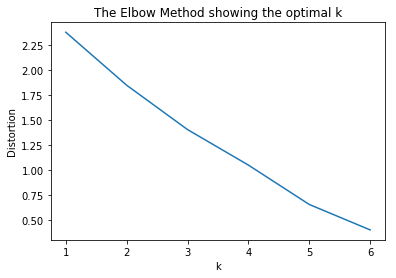

In [67]:
 # clustering dataset
# determine k using elbow method

from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt



# k means determine k
distortions = []
K = range(1,7)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(cluster_dataset)
    kmeanModel.fit(cluster_dataset)
    distortions.append(sum(np.min(cdist(cluster_dataset, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / cluster_dataset.shape[0])

# Plot the elbow
plt.plot(K, distortions)
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

#### The graph shows a fairly consistent and steady line, but 3 and 5 show sharper changes.  3 will be adopted as it simplifies the clustering for an already small data set.

In [68]:
kclusters=3 #because we have 5 food carts, and we're breaking into three clusters, 
#we'll rotate the extra two carts among the the locations of what's determined to be the 'top' cluster.

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(cluster_dataset)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 2, 2, 1, 2, 0, 0], dtype=int32)

#### When the labels are added to the foundational dataframe, df, it will constitute the final result of this investigation.  That data will be used to compose a map which identifies the stations and their clusters by color coordination.

## Results: Discuss the results

#### Below is the final result of the foundational dataframe, including all the data pertinent to this study.

In [69]:
#dropping Daly City as no cafes exist there and that makes it its own unique category
df=df.drop(index=0)
df.reset_index(drop=True)
# add clustering labels
df.insert(0, 'Cluster Labels', kmeans.labels_)
df

,Cluster Labels,BART Station,Address,Latitude,Longitude,Number of Cafes,Frequency of Cafes,Local Frequency Ranking,Competition Average Rank,Highest Competition Rank
1,1,Balboa Park,"401 Geneva Ave, San Francisco, CA 94112",37.716244,-122.440826,1,0.05,4.0,6.2,6.2
2,1,Glen Park,"2901 Diamond St, San Francisco, CA 94131",37.733104,-122.433805,5,0.12,1.0,7.325,7.9
3,2,24th St Mission,"2800 Mission St, San Francisco, CA 94110",37.752110,-122.418536,2,0.04,9.0,7.25,7.7
4,2,16th St Mission,"2000 Mission St, San Francisco, CA 94110",37.764922,-122.419761,2,0.04,4.0,8.6,9.1
5,1,Civic Center,"1150 Market St, San Francisco, CA 94102",37.779501,-122.413969,5,0.18,1.0,6.56,7.2
6,2,Powell St,"865 Market St, San Francisco, CA 94103",37.783564,-122.407040,4,0.05,2.0,8.45,9.3
7,0,Montgomery St,"598 Market St, San Francisco, CA 94104",37.788431,-122.402633,10,0.11,1.0,8.22,9.1
8,0,Embarcadero,"298 Market St, San Francisco, CA 94111",37.792409,-122.397153,9,0.22,1.0,8.06667,8.9


#### These data provide some interesting insights.  Cluster 0 was occupied by two stations at the end of the line, Embarcadero and Montgomery.  This is not surprising as these stations boast the highest number, and among the highest frequencies of all the stations, with nearly the highest customer ratings, and at the two closest GPS points.  In cluster 1, Two stations at the other end of the line, Balboa Park and Glen Park, actually had more in common with downtown location, Civic Center, than Civic Center's nearby stations, 24th st and 16th st.  Cluster 1 businesses seem to be marked bya medium number cafes with high frequency, and lower customer ratings.  Cluster 2 found similiarities between downtown-peripheral stations 24th and 16th street with downtown station Powell St.  Cluster 2 cafes seem to have the lowest number and frequency, while maintaining medium rankings.  Daly City BART Station presents an interesting category of its own, as there are only four businesses around it, none of which are coffeeshops.  The ratings of all stations seem to generally trend higher when the station is closer to downtown (with the exception of Civic Center station).

#### Looking at dataframe BVcafcof, which details the specific competition, some interesting trends emerge.  Nine of the 37 coffee shops (almost 25%) within 250 meters of BART stations are corporate branded shops.  A cursory review of the ratings of corporate branded shops show them to be average or higher than average, with the exception of a Civic Center Starbucks, which boasts a rating of 6.2.

In [70]:
import matplotlib.cm as cm
import matplotlib.colors as colors
#vizualize resulting clusters

# create map
map_clusters = folium.Map(location=[sflatitude, sflongitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df['Latitude'], df['Longitude'], df['BART Station'], df['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Discussion: discuss observations and recommendations that can be drawn from the results.

### Unexpected developments:
#### At the beginning of this investigation, it was quickly discovered that BART stations have a given train arriving in either direction once every 3 or so minutes during the high activity times I wanted to explore. Therefore, specific timeslots relative to train arrival were abandoned as focal points, and instead 20 minute time intervals were chosen, or 6 data points per window.  The lunchtime and evening window were abandoned as points for study due to the snacks and beverages being offered centering around “caffeine fuel-ups,” which were assumed to be most common in the morning periods.  I had imagined the experiment could be replicated in the future for other timeframes as necessary.  I had also imagined the experiment could also be repeated look at multiple days to see averages over time and trends for individual days.

#### However, the timestamped data proved to be a fruitless investigation, as Foursquare trending data (at least that which is publicly available) does not address hyperspecific GPS points in areas of a city.  I found, after looking at multiple times of day and in different parts of the city, that 1) only one location tended to be trending 2) often times no locations in the entire city were trending 3) when a location was trending it was the same venue regardless of searches being conducted from various parts of the city 4) the trending location was rarely (in fact, never, during my searhes) a coffee shop. Therefore, timestamped data was abandoned as a focal point of the study, and customer ratings were instead adopted to add depth to the data.

#### I had originally intended to study a 400 meter radius, but upon investigation of google maps and corresponding distances around stations, it was deemed to be too large of a radius, especially at more urban stations.  A radius of 250 meters was chosen to give some inclusion to more rural stations, without generating too much noise around urban stations.

#### The Powell St station address is listed as 899 Market, but the GPS coordinates given by geopy place the station somewhere between the 16th St Mission station and the Civic Center station.  I realized this when looking through the dataframe I sorted by latitude, which showed Powell St out of order.  I then went to Google maps to find the address of a business nearby the Powell St station.  When using this address, 865 Market, the GPS coordinates were accurate.

#### The elbow method for optimal k for k-means was not as effective as I had hoped.  I think this was due to a relatively small data set with similar data therein.  Future studies could look at adding more data points, like ridership info, to add depth that may help starkly differentiate the k-means machine learning algorithm.

#### The ridership data that was publicly available from BART was interesting, but it lacked specificity. It showed monthly ridership data, which was problematic as the ideal focus of this study is for the weekday timeframe.  For this reason, I did not include it in this study.  However, the information shows promise, and could be included in future models, if the data are wrangled carefully.

### Interpretations and Recommendations:
#### Looking at the data for Cluster 0, which includes Montgomery and Emarcadero, it was observed that while these stations are very busy and in densely populated areas (which are usually good indicators for placing a business, especially if your overhead is low), the coffeeshops' high customer satisfaction in a dense market with a high amount of competition makes Cluster 0 a potentially dubious place to open up shop.  If the entrepreneur finds a niche, this could be a good place to exploit. The mobile aspect of the business provides a high visibility to the consumer immediately upon leaving the train.  However, in the morning, these stations are destinations, not origins, and it's possible that a higher percentage of traffic at this station will have already had a caffeinated beverage and snack.  Continued market research, as indicated in the "Why this study? What next?" section of the Introduction, is highly advised. As a result of the preceding evaluation, Cluster 0 has been dubbed "High Risk. High Reward?"

#### Cluster 1 (Glen and Balboa Park, and Civic Center) showed a surprising deviation from my expectation, which was that geographic location (regardless of whether it was included in the algorithm) would define the clusters more strongly by virtue of supply and demand that accompanies population density. But even with the inclusion of geographic data in the machine learning algorithm, distant stations had strong correlation to a downtown station.  These stations really are similar. As noted in results, these stations are marked by medium number cafes with high frequency, and lower customer ratings, provide an excellent opportunity for business.  There are not too many individual competitors, yet coffeeshops occupy a large corner of the market, which is comprised of unhappy customers.  All three of these qualities present strong opportunities for a new business.  Additionally, because these stations are further from the downtown area, they are origins, which suggests that a higher percentage of their riders will not have already gotten their morning caffeinated beverage and snack.  Because of all these strong indicators, this cluster has been dubbed "The Land of Opportunity."

#### Cluster 2 (24th and 16th St Mission, and Powell St) is marked by the lowest number and frequency of coffeeshops, while maintaining medium rankings.  It also has the lowest Local Frequency Ranking meaning there are more type of businesses that are more common than in any other cluster.  At face value, this cluster presents great opportunity given how few coffeeshops there are in the areas.  However, their scarceness could be due to the fact that coffeeshops are not sucessful in these locations.  Additionally, customer satisfaction is in the medium range, which means that the competition that's already there would be stronger than the competition in, say, Cluster 1.  However, one benefit to the stations in this cluster is that they are more similar to origin stations than those in Cluster 0, so the people who frequent them may be better potential customers. This is the second best cluster where I'd advise placing business due to its market opportunity and customer profile. Cluster 2's title is "The Middle Ground."

#### Daly City station presents similar advantages to those of Cluster 2, namely, its status as an origin station and its total lack of competition.  However, further market research is required for this location as there are very few established businesses at this location. I would not advise placing a business here until thorough research has been done and probably until existing business locations are successful.

#### Looking at the detailed information on the competition in the dataframe BVcafcof, about a quarter of the businesses are corporate. This indicates that there is support for independent snack and beverage shops in the marketplace, which is fantastic news for the entrepreneur.  The entrepreneur could also note that 25%, while a minority, is still significant, and perhaps modeling some aspects of his business after the corporate structure would yield a larger market of consumers of his products.

### Future direction:
#### I recommend continued data collection both prior to and after starting the business.  I recommend tick counters or tallies at BART station entrances/exits to generate proprietary data on foot traffic moving in and out of BART stations at documented time intervals.  I still recommend time-marked surveys of riders to gauge whether they've already had their beverages and snacks in order to confirm hypotheses about the consumer profiles at origin and destination stations.  I recommend investigating BART stations across the bay in Alameda County because my preliminary review of BART rider data suggests high traffic stations exist within a couple of stops of the downtown San Francisco stations. This may complicate the initial business model preparation, but it would certainly be valuable for the future if those locations couldn't be addressed at launch.

## Conclusion

#### In conclusion, I recommend placing at least two of five food carts within "The Land of Opportunity," and three if the entrepreneur decides to avoid "High Risk. High Reward?" altogether. I recommend placing another two food carts within "The Middle Ground." I recommend placing the last food cart in "High Risk. High Reward?" because there's too much potential value there to miss out on, and having a location there would allow further data collection to clarify marketplace understanding.

#### When choosing which station(s) within the clusters to place food carts, I'd recommend making a decision based on insights from examining nearby competition.  Additionally, there could be value in rotating carts within clusters to gauge market interest and gather more data. One conclusion that can be drawn (with certainty) from this study is that the more data an entrepreneur has, the better he is equipped to determine strategy for his company.